# 10.3 RANDOM WALK WITH RANDOM WAITING TIMES

Use this notebook to store your work for this problem.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from numpy.random import default_rng
rng = default_rng()
rand = rng.random

## (a)

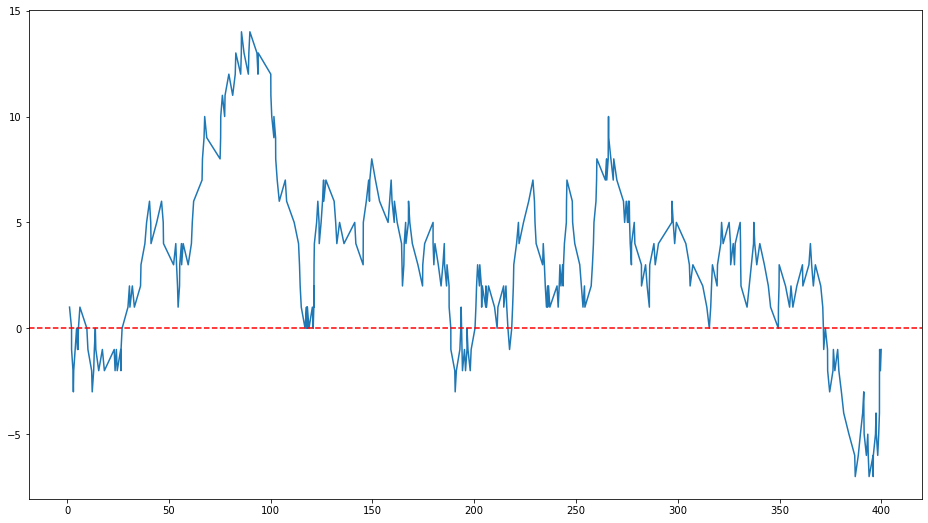

In [74]:
beta = 1
rand_num = -((1/beta) * np.log(rand(800))).cumsum()
time = rand_num[(rand_num > 0) * (rand_num < 400)]

num_steps = len(time)
X_rand = 2*(rand(num_steps) < 0.5) - 1
X = X_rand.cumsum()

plt.figure(figsize = (16,9))
plt.plot(time,X)
plt.axhline(y = 0, color = 'r',linestyle = '--')


## (b)

In [101]:
num_sim = 50
beta = 1
end_time = [200,400,600] 
mean = np.zeros(3)
var = np.zeros(3)
a = 0
for N in end_time:
    for i in range(num_sim):
        rand_num = -((1/beta) * np.log(rand(2*N))).cumsum()
        time = rand_num[(rand_num > 0) * (rand_num < N)]

        num_steps = len(time)
        X_rand = 2*(rand(num_steps) < 0.5) - 1
        X = X_rand.cumsum()
        endpoints[i] = X[-1]
    mean[a] = endpoints.mean()
    var[a] = endpoints.var()
    a = a+1


array([-0.2 , -0.31, -0.24])

## (c)

## (d)

## (e)